# Traffic Collision Data Analysis

# Objective

In this case study, you will be working on California Traffic Collision Data Analysis using Apache Spark, a powerful distributed computing framework designed for big data processing. This assignment aims to provide hands-on experience in analyzing large-scale traffic collision datasets using PySpark and AWS services. You will apply data analytics techniques to clean, transform, and explore crash data, drawing meaningful insights to support traffic safety and urban planning. Beyond understanding how big data tools optimize performance on a single machine and across clusters, you will develop a structured approach to analyzing crash trends, identifying high-risk locations, and evaluating contributing factors to traffic incidents. Additionally, you will utilize AWS S3 to store the processed data efficiently after the ETL process, enabling scalable storage and easy retrieval for further analysis.


# Business Value:

Traffic collisions pose significant risks to public safety, requiring continuous monitoring and analysis to enhance road safety measures. Government agencies, city planners, and policymakers must leverage data-driven insights to improve infrastructure, optimize traffic management, and implement preventive measures.

In this assignment, you will analyze California traffic collision data to uncover patterns related to accident severity, location-based risks, and key contributing factors. With Apache Spark's ability to handle large datasets efficiently and AWS S3's scalable storage, transportation authorities can process vast amounts of crash data in real time, enabling faster and more informed decision-making.

As an analyst examining traffic safety trends, your task is to analyze historical crash data to derive actionable insights that can drive policy improvements and safety interventions. Your analysis will help identify high-risk areas, categorize accidents by severity and contributing factors, and store the processed data in an AWS S3 bucket for scalable and long-term storage.

By leveraging big data analytics and cloud-based storage, urban planners and traffic authorities can enhance road safety strategies, reduce accident rates, and improve public transportation planning.


# Dataset Overview

The dataset used in this analysis consists of California traffic collision data obtained from the Statewide Integrated Traffic Records System (SWITRS). It includes detailed records of traffic incidents across California, covering various attributes such as location, severity, involved parties, and contributing factors. The dataset has been preprocessed and transformed using PySpark to facilitate large-scale analysis. By leveraging Apache Spark, we ensure efficient data handling, enabling deeper insights into traffic patterns, accident trends, and potential safety improvements.

The dataset is a .sqlite file contains detailed information about traffic collisions across California and is structured into four primary tables:
- `collisions` table contains information about the collision, where it happened, what vehicles were involved.

- `parties` table contains information about the groups people involved in the collision including age, sex, and sobriety.

- `victims` table contains information about the injuries of specific people involved in the collision.

- `locations` table contains information about the geographical location and details of road intersections.

# Assignment Tasks

<ol>
    <li>
        <strong>Data Preparation</strong></br>
        The dataset consists of structured tables containing traffic collision data. Before conducting any analysis, it is essential to ensure that the data is properly formatted and structured for efficient processing.</br>
        Check for data consistency and ensure all columns are correctly formatted.</br>
        Apply sampling techniques if needed to extract a representative subset for analysis.</br>
        Structure and prepare the data for further processing and analysis.</br>
    </br>
    <li>
        <strong>Data Cleaning</strong></br>
            2.1 <strong>Fixing Columns:</strong> Ensure all columns are properly named and formatted.</br>
            2.2 <strong>Handling Missing Values:</strong> Decide on an approach to handle missing data (e.g., imputation or removal). Mention the approach in your report.</br>
            2.3 <strong>Handling Outliers:</strong> Identify outliers in the dataset and explain why they are considered outliers. It is not necessary to remove them for this task, but mention your approach for handling them.</br>
    </br>
    <li>
        <strong>Exploratory Data Analysis</strong></br>
        Finding Patterns and analyze the dataset and find patterns based on the following points:
                <ul>
                3.1 Classify variables into categorical and numerical types.</br>
                3.2 Analyze the distribution of collision severity.</br>
                3.3 Examine weather conditions during collisions.</br>
                3.4 Analyze the distribution of victim ages.</br>
                3.5 Study the relationship between collision severity and the number of victims.</br>
                3.6 Analyze the correlation between weather conditions and collision severity.</br>
                3.7 Visualize the impact of lighting conditions on collision severity.</br>
                3.8 Extract and analyze weekday-wise collision trends.</br>
                3.9 Assess the number of collisions occurring on different days of the week.</br>
                3.10 Study spatial distribution of collisions by county.</br>
                3.11 Generate a scatter plot to analyze collision locations geographically.</br>
                3.12 Extract and analyze collision trends over time, including yearly, monthly, and hourly trends.</br>
</ul>
</br>
<li>
<strong>ETL Querying</strong><br>
Write PySpark SQL queries for the following:</br>
<ol>
    4.1. Load the processed dataset as CSV files in S3 bucket.</br>
    4.2. Identify the top 5 counties with the highest number of collisions.</br>
    4.3. Identify the month with the highest number of collisions.</br>
    4.4. Determine the most common weather condition during collisions.</br>
    4.5. Calculate the percentage of collisions that resulted in fatalities.</br>
    4.6. Find the most dangerous time of day for collisions.</br>
    4.7. Identify the top 5 road surface conditions with the highest collision frequency.</br>
    4.8. Analyze lighting conditions that contribute to the highest number of collisions.</br>
</ol>
</br>
<li>
<strong>Conclusion</strong></br>
Provide final insights and recommendations based on the analysis:
    <ul>
        5.1 Recommendations to improve road safety by identifying high-risk locations and peak accident times for infrastructure improvements.</br>
        5.2 Suggestions to optimize traffic management by analyzing trends in collision severity, weather conditions, and lighting to improve road design and traffic signal timing.</br>
        5.3 Propose data-driven policy changes to enhance pedestrian and cyclist safety based on collision trends involving vulnerable road users.</br>
        5.4 Identify potential high-risk zones for proactive intervention by examining geographic collision density and historical accident data.</br>
        5.5 Assess the impact of environmental factors such as weather, road surface conditions, and lighting on accident frequency and severity.</br>
        5.6 Develop predictive models to anticipate collision hotspots and support proactive safety measures.</br>
        </ul>
        Conclude the analysis by summarizing key findings and business implications.</br>
        Explain the results of univariate, segmented univariate, and bivariate analyses in real-world traffic safety and policy terms.</br>
        Include visualizations and summarize the most important results in the report. Insights should explain why each variable is important and how they can influence traffic safety policies and urban planning.</br>
        </ul>
        </br>
    <li>
    <strong>Visualization Integration [Optional]</strong>
    <p>Enhance the project by incorporating a visualization component that connects the processed data stored in an S3 bucket to a business intelligence tool such as Tableau or Power BI. This involves setting up the connection between the S3 bucket and the chosen visualization tool, importing the processed dataset for analysis and visualization, creating interactive dashboards to explore key trends and insights and ensuring data updates are reflected dynamically in the visualization tool.<br>
</br>
</ol>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Install Required Libraries

In [1]:
## Install the required libraries
!pip install --quiet pyspark==3.5.4 pandas==2.2.2

In [1]:
# Import the necessary libraries
import sqlite3
import pandas as pd
from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .appName("EtlProjectTrafficCollisionsAnalysis") \
    .getOrCreate()
from pyspark.sql.functions import * 

26/01/13 14:35:58 WARN Utils: Your hostname, Piyush resolves to a loopback address: 127.0.1.1; using 10.255.255.254 instead (on interface lo)
26/01/13 14:35:58 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
26/01/13 14:36:00 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


#**1. Data Preparation** <font color = red>[5 marks]</font> <br>

The dataset consists of structured tables containing traffic collision data.

Before conducting any analysis, it is essential to ensure that the data is properly formatted and structured for efficient processing.

Check for data consistency and ensure all columns are correctly formatted.

In [2]:
# Write code to load the data and check the schema
df_caseId = spark.read.csv("sample_case_ids.csv", header = True, inferSchema = True)
df_collisions = spark.read.csv('sample_collisions.csv', header = True, inferSchema = True)
df_parties = spark.read.csv("sample_parties.csv", header = True, inferSchema = True)
df_victims = spark.read.csv("sample_victims.csv", header = True, inferSchema = True)

df_caseId.printSchema()
df_collisions.printSchema()
df_parties.printSchema()
df_victims.printSchema()

26/01/13 14:36:19 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors
[Stage 7:====>                                                    (1 + 11) / 12]

root
 |-- case_id: double (nullable = true)
 |-- db_year: integer (nullable = true)

root
 |-- case_id: double (nullable = true)
 |-- jurisdiction: double (nullable = true)
 |-- officer_id: string (nullable = true)
 |-- reporting_district: string (nullable = true)
 |-- chp_shift: string (nullable = true)
 |-- population: string (nullable = true)
 |-- county_city_location: integer (nullable = true)
 |-- county_location: string (nullable = true)
 |-- special_condition: double (nullable = true)
 |-- beat_type: string (nullable = true)
 |-- chp_beat_type: string (nullable = true)
 |-- chp_beat_class: string (nullable = true)
 |-- beat_number: string (nullable = true)
 |-- primary_road: string (nullable = true)
 |-- secondary_road: string (nullable = true)
 |-- distance: double (nullable = true)
 |-- direction: string (nullable = true)
 |-- intersection: double (nullable = true)
 |-- weather_1: string (nullable = true)
 |-- state_highway_indicator: double (nullable = true)
 |-- caltrans_cou

#**2. Data Cleaning** <font color = red>[20 marks]</font> <br>


In [15]:
#Display Schema & Sample Data
df_caseId.printSchema()
df_collisions.printSchema()
df_parties.printSchema()
df_victims.printSchema()

df_caseId.show(5)
df_collisions.show(5)
df_parties.show(5)
df_victims.show(5)


root
 |-- case_id: double (nullable = true)
 |-- db_year: integer (nullable = true)

root
 |-- case_id: double (nullable = true)
 |-- jurisdiction: double (nullable = true)
 |-- officer_id: string (nullable = true)
 |-- reporting_district: string (nullable = true)
 |-- chp_shift: string (nullable = true)
 |-- population: string (nullable = true)
 |-- county_city_location: integer (nullable = true)
 |-- county_location: string (nullable = true)
 |-- special_condition: double (nullable = true)
 |-- beat_type: string (nullable = true)
 |-- chp_beat_type: string (nullable = true)
 |-- chp_beat_class: string (nullable = true)
 |-- beat_number: string (nullable = true)
 |-- primary_road: string (nullable = true)
 |-- secondary_road: string (nullable = true)
 |-- distance: double (nullable = true)
 |-- direction: string (nullable = true)
 |-- intersection: double (nullable = true)
 |-- weather_1: string (nullable = true)
 |-- state_highway_indicator: double (nullable = true)
 |-- caltrans_cou

##**2.1 Missing Values** <font color = red>[10 marks]</font> <br>


In [3]:
df_victims = df_victims.drop('id')
df_parties = df_parties.drop('id')

In [4]:
df_parties = df_parties.withColumnRenamed('party_number','party_number_parties')

In [5]:
df_main = df_collisions.join(df_parties, on='case_id', how='left')\
                        .join(df_victims, on='case_id', how='left')\
                        .join(df_caseId, on='case_id', how='left')

In [12]:
from pyspark.sql import functions as F

# Aggregate null counts for each column
null_counts_df_main = df_main.agg(*[
    F.sum(F.col(c).isNull().cast("int")).alias(c)
    for c in df_main.columns
])

# Collect the single result row once
null_counts_row = null_counts_df_main.first()

# Build dictionary of nonzero null counts
null_counts_filtered_main = {
    c: null_counts_row[c]
    for c in df_main.columns
    if null_counts_row[c] > 0
}

# Show the result
null_counts_filtered_main

{'at_fault': 686613, 'party_number': 767320}

In [6]:
#Drop Sparse Columns
df_main = df_main.drop('victim_safety_equipment_1','victim_safety_equipment_2','reporting_district','beat_number','direction','caltrans_county','caltrans_district',
                       'state_route','postmile','side_of_highway','pcf_violation_subsection','chp_vehicle_type_at_fault','chp_beat_class','beat_number',
                       'state_highway_indicator','primary_road','secondary_road','state_route','side_of_highway','tow_away','pcf_violation_category',
                       'pcf_violation',"officer_id","population","county_city_location","beat_type","chp_beat_type","location_type","control_device",
                       "chp_road_type","not_private_property","process_date"'party_safety_equipment_2','financial_responsibility','chp_vehicle_type_towing',
                       'chp_vehicle_type_towed','financial_responsibility','chp_vehicle_type_towing','chp_vehicle_type_towed','other_associate_factor_1',
                       'movement_preceding_collision','party_safety_equipment_2','party_number_parties','db_year')

In [7]:
#Convert Data Types
main_numeric_cols = [
    "case_id", "jurisdiction", "special_condition", "distance",
    "intersection","killed_victims", "injured_victims", "party_count",
    "severe_injury_count", "other_visible_injury_count",
    "complaint_of_pain_injury_count",
    "pedestrian_killed_count", "pedestrian_injured_count",
    "bicyclist_killed_count", "bicyclist_injured_count",
    "motorcyclist_killed_count", "motorcyclist_injured_count",
    "latitude", "longitude", "case_id", "party_number", "at_fault",
    "party_age", "cellphone_in_use",
    "party_number_killed", "party_number_injured",
    "vehicle_year", "case_id", "party_number", "victim_age"
]

for c in main_numeric_cols:
    df_main = df_main.withColumn(c, col(c).cast("double"))

In [8]:
#Handle Missing Values
df_main = df_main.dropna( subset = [ 'jurisdiction',
 'special_condition',
 'intersection',
 'weather_1',
 'killed_victims',
 'injured_victims',
 'primary_collision_factor',
 'type_of_collision',
 'motor_vehicle_involved_with',
 'pedestrian_action',
 'road_surface',
 'road_condition_1',
 'lighting',
 'collision_time'
 ])
df_main = df_main.filter(
    (col("party_sex") != 'X') | col("party_sex").isNull()
)
df_main = df_main.filter(
    (col("party_sex") != 'X') | col("party_sex").isNull()
)

In [9]:
df_main = df_main.fillna({
    'party_sobriety': 'Unknown',
    'direction_of_travel': 'Unknown',
    'party_safety_equipment_1': 'Unknown',
    'cellphone_use_type': 'Unknown',
    'vehicle_make': 'Unknown',
    'statewide_vehicle_type': 'Unknown',
    'party_race': 'Unknown',
    'party_type': 'Unknown',
    'victim_role': 'Unknown',
    'victim_sex' : 'Unknown',
    'victim_seating_position': 'Unknown',
    'victim_ejected':'Unknown',
    'party_sex' : 'Unknown',
    'statewide_vehicle_type_at_fault' : 'Unknown',
    'victim_degree_of_injury': 'No victim'
})
df_main = df_main.fillna({
    'cellphone_in_use': 0,
    'vehicle_year': -1,
    'victim_age': -1,
    'party_age' : -1,
    'latitude' : 0,
    'longitude' :0,
    'party_number_killed': 0,
    'party_number_injured' :0
        

})

In [10]:
df_main = df_main.withColumn("collision_year", year(col("collision_date")))
df_main = df_main.withColumnRenamed("collision_year", "year")

##**2.2 Fixing Columns** <font color = red>[5 marks]</font> <br>


In [11]:
#Remove Duplicates
df_main = df_main.dropDuplicates(["case_id"])

In [30]:
#Detect Outliers using IQR

# List of numerical columns to check for outliers
columnsToCheck = ['party_age','victim_age']
for c in columnsToCheck:
    Q1, Q3 = df_main.approxQuantile(c,[0.25,0.75],0.01)
    IQR = Q3-Q1
    lowerbound = Q1 - 1.5*IQR
    upperbound = Q3 + 1.5*IQR
    outliers_df = df_main.filter((col(c) < lowerbound )|(col(c) > upperbound))

outliers_df_temp = outliers_df.filter((col('party_age') > 0) & (col('victim_age') > 0)).select('party_age','victim_age').orderBy(col('party_age')\
                        .desc())
outliers_df_temp.show()

+---------+----------+
|party_age|victim_age|
+---------+----------+
|    120.0|      42.0|
|     99.0|      17.0|
|     98.0|      98.0|
|     97.0|      95.0|
|     95.0|      11.0|
|     93.0|      93.0|
|     93.0|      66.0|
|     93.0|      44.0|
|     93.0|      73.0|
|     92.0|      92.0|
|     92.0|       7.0|
|     92.0|      32.0|
|     91.0|      13.0|
|     91.0|      84.0|
|     91.0|      50.0|
|     91.0|      91.0|
|     90.0|       4.0|
|     90.0|      77.0|
|     90.0|      91.0|
|     90.0|      35.0|
+---------+----------+
only showing top 20 rows



In [16]:
outlier_df1 = df_main.filter(col("vehicle_year") > 0).select('vehicle_year').orderBy(col('vehicle_year').asc())
outlier_df1.show(10)

[Stage 72:====>                                                   (1 + 11) / 12]

+------------+
|vehicle_year|
+------------+
|      1006.0|
|      1021.0|
|      1912.0|
|      1921.0|
|      1922.0|
|      1922.0|
|      1922.0|
|      1925.0|
|      1929.0|
|      1929.0|
+------------+
only showing top 10 rows



In [13]:
outlier_df1 = df_main.filter(col("vehicle_year") > 0).select('vehicle_year').orderBy(col('vehicle_year').desc())
outlier_df1.show(10)

[Stage 48:==============================================>         (10 + 2) / 12]

+------------+
|vehicle_year|
+------------+
|      2100.0|
|      2022.0|
|      2021.0|
|      2021.0|
|      2021.0|
|      2021.0|
|      2021.0|
|      2021.0|
|      2021.0|
|      2021.0|
+------------+
only showing top 10 rows



##**2.3 Outlier Analysis** <font color = red>[5 marks]</font> <br>


In [12]:
#Remove Outliers
df_main = df_main.filter((col('party_age') < 100) & (col('vehicle_year') > 1950)  & (col('vehicle_year') < 2022 ))


In [33]:
'''
Domain-based filtering was applied to remove impossible values (e.g., future vehicle years, unrealistically old vehicles, and extreme ages) 
prior to statistical outlier detection
'''

152624

#**3. Exploratory Data Analysis** <font color = red>[65 marks]</font> <br>


##**3.1.1. Data Preparation** <font color = red>[5 marks]</font> <br>

Q: Classify variables into categorical and numerical.

In [13]:
df_main = df_main.withColumn("year", year("collision_date")) \
                 .withColumn("month", month("collision_date")) \
                 .withColumn("day_of_week", dayofweek("collision_date")) \
                 .withColumn("hour", hour("collision_time"))

In [14]:
# Encode Categorical Variables

df_main = df_main.withColumn(
    "hit_and_run_flag",
    when(col("hit_and_run") == "not hit and run", 0).otherwise(1)
)

# String Indexing for Categorical Columns
'''
String indexing is not required at this stage of the notebook since exploratory analysis can be performed directly on categorical variables. 
Indexing is only required in Spark when preparing data for machine learning models, because ML algorithms require numerical input features. 
Since the current section focuses on EDA, categorical variables will remain in string form.
'''

'\nString indexing is not required at this stage of the notebook since exploratory analysis can be performed directly on categorical variables. \nIndexing is only required in Spark when preparing data for machine learning models, because ML algorithms require numerical input features. \nSince the current section focuses on EDA, categorical variables will remain in string form.\n'

In [15]:
# Reordering & Renaming Columns
df_main = df_main.withColumnRenamed("collision_severity", "severity") \
                 .withColumnRenamed("primary_collision_factor", "collision_factor") \
                 .withColumnRenamed("party_safety_equipment_1", "safety_equipment") \
                 .withColumnRenamed("statewide_vehicle_type", "vehicle_type") \
                 .withColumnRenamed("party_race", "race") \
                 .withColumnRenamed("victim_degree_of_injury", "injury_severity") \
                 .withColumnRenamed("motor_vehicle_involved_with", "vehicle_involved_with") \
                 .withColumnRenamed("pedestrian_action", "ped_action") \
                 .withColumnRenamed("road_condition_1", "road_condition") \
                 .withColumnRenamed("hit_and_run", "hit_run_type") \
                 .withColumnRenamed("process_date", "reported_date")



In [16]:
final_order = [
    # Identifiers
    "case_id", "party_number",
    # Date/Time
    "collision_date", "collision_time", "reported_date",
    "year", "month", "day_of_week", "hour",
    # Location
    "latitude", "longitude", "county_location", "jurisdiction",
    # Collision
    "severity", "collision_factor", "type_of_collision", "hit_run_type",
    "hit_and_run_flag","vehicle_involved_with", "ped_action", "weather_1",
    "road_surface", "road_condition", "lighting", "special_condition",
    "distance", "intersection", "party_count",
    "killed_victims", "injured_victims",
    "pedestrian_collision", "bicycle_collision", "motorcycle_collision",
    "truck_collision",
    "severe_injury_count", "other_visible_injury_count",
    "complaint_of_pain_injury_count",
    # Party
    "party_type", "at_fault", "party_sex", "party_age",
    "party_sobriety", "direction_of_travel", "safety_equipment",
    "cellphone_in_use", "cellphone_use_type",
    "party_number_killed", "party_number_injured",
    "vehicle_year", "vehicle_make", "vehicle_type", "race",
    # Victim
    "victim_role", "victim_sex", "victim_age",
    "injury_severity", "victim_seating_position", "victim_ejected"
]

In [17]:
# Final cleaned data
df_final = df_main.select(final_order)

In [18]:
df_final.printSchema()

root
 |-- case_id: double (nullable = true)
 |-- party_number: double (nullable = true)
 |-- collision_date: date (nullable = true)
 |-- collision_time: timestamp (nullable = true)
 |-- reported_date: date (nullable = true)
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- day_of_week: integer (nullable = true)
 |-- hour: integer (nullable = true)
 |-- latitude: double (nullable = false)
 |-- longitude: double (nullable = false)
 |-- county_location: string (nullable = true)
 |-- jurisdiction: double (nullable = true)
 |-- severity: string (nullable = true)
 |-- collision_factor: string (nullable = true)
 |-- type_of_collision: string (nullable = true)
 |-- hit_run_type: string (nullable = true)
 |-- hit_and_run_flag: integer (nullable = false)
 |-- vehicle_involved_with: string (nullable = true)
 |-- ped_action: string (nullable = true)
 |-- weather_1: string (nullable = true)
 |-- road_surface: string (nullable = true)
 |-- road_condition: string (nullab

Loading the Final Cleaned Dataset into S3 Bucket

##**3.1.2. Analyze the distribution of collision severity.** <font color = red>[5 marks]</font> <br>

Q: Analyze the distribution of collision severity.

In [19]:
collision_severity = df_final.groupBy('severity').count().show()

+--------------------+-----+
|            severity|count|
+--------------------+-----+
|property damage only|85075|
|                pain|37608|
|        other injury|16385|
|       severe injury| 2846|
+--------------------+-----+



26/01/13 14:37:29 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
                                                                                

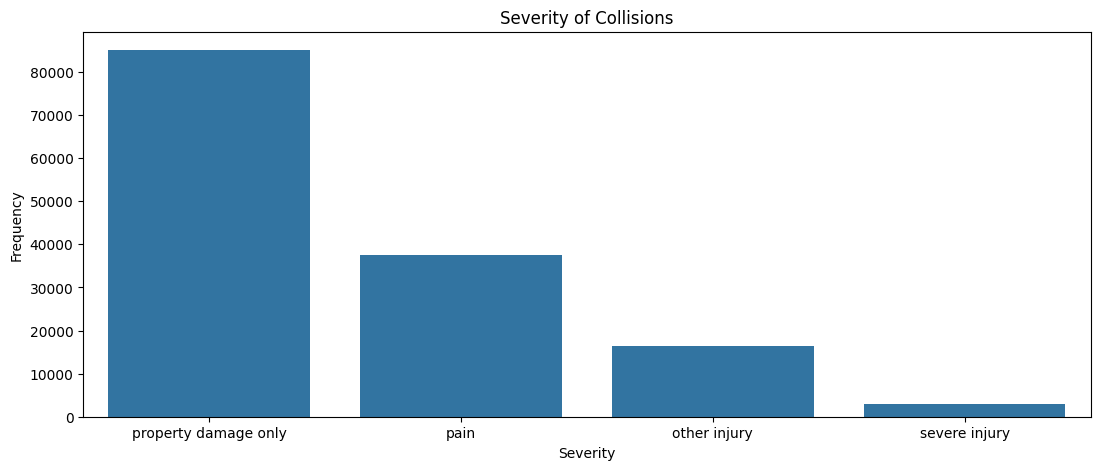

In [19]:
# Univariate Analysis

# Collision Severity Distribution

import matplotlib.pyplot as plt
import seaborn as sns

# Convert to Pandas
pdf = df_final.toPandas()
# Plot
plt.figure(figsize=(13,5))
sns.countplot(data=pdf, x='severity')
plt.title('Severity of Collisions')
plt.xlabel('Severity')
plt.ylabel('Frequency')
plt.show()

##**3.1.3. Weather conditions during collisions.** <font color = red>[5 marks]</font> <br>

Q: Examine weather conditions during collisions.

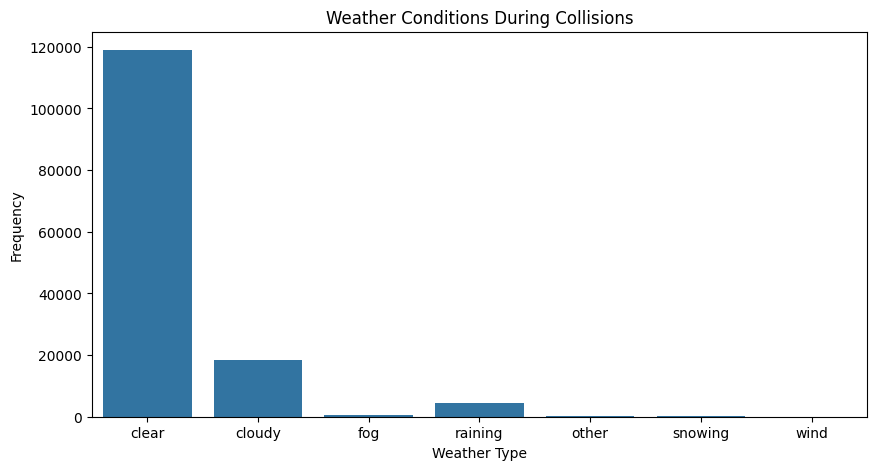

In [72]:
# Weather Conditions During Collisions

# Convert to Pandas

# Plot
plt.figure(figsize=(10,5))
sns.countplot(data=pdf, x='weather_1')
plt.title('Weather Conditions During Collisions')
plt.xlabel('Weather Type')
plt.ylabel('Frequency')
plt.show()

##**3.1.4. Victime Age Distribution.** <font color = red>[5 marks]</font> <br>

Q: Analyze the distribution of victim ages.

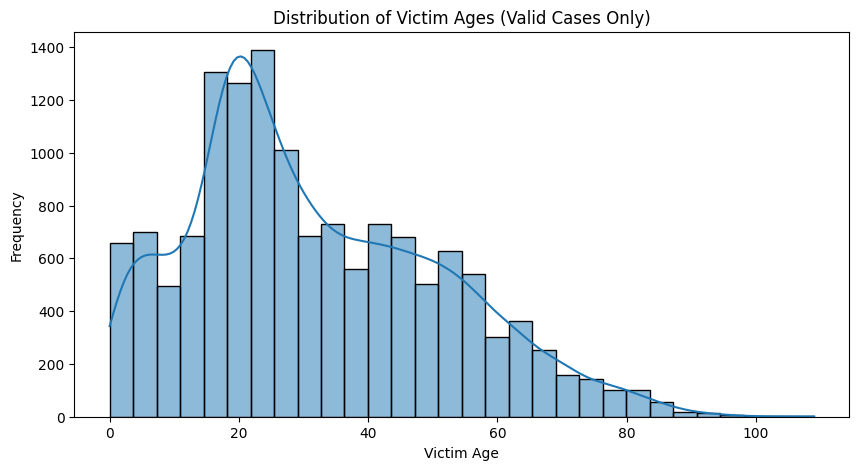

In [21]:
# Distribution of Victim Ages


# Convert to Pandas
valid = pdf[pdf['victim_age'] != -1]
# Plot
plt.figure(figsize=(10,5))
sns.histplot(data=valid, x='victim_age', bins=30, kde=True)
plt.title('Distribution of Victim Ages (Valid Cases Only)')
plt.xlabel('Victim Age')
plt.ylabel('Frequency')
plt.show()

##**3.1.5. Collision Severity vs Number of Victims.** <font color = red>[5 marks]</font> <br>

Q: Study the relationship between collision severity and the number of victims.

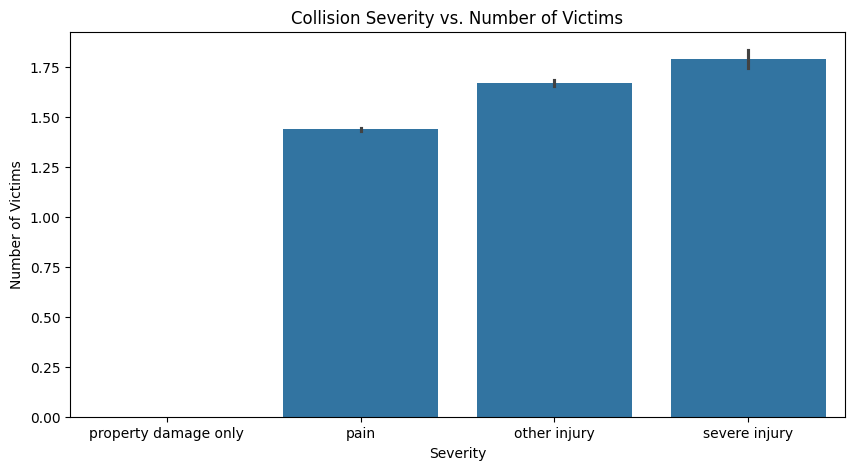

In [79]:
# Bivariate Analysis

# Collision Severity vs. Number of Victims
pdf['total_victims'] = pdf['injured_victims'] + pdf['killed_victims']

# Convert to Pandas

# Plot
plt.figure(figsize=(10,5))
sns.barplot(data=pdf, x='severity', y='total_victims')
plt.title('Collision Severity vs. Number of Victims')
plt.xlabel('Severity')
plt.ylabel('Number of Victims')
plt.show()

##**3.1.6. Weather Conditions vs Collision Severity.** <font color = red>[5 marks]</font> <br>

Q: Analyze the correlation between weather conditions and collision severity.

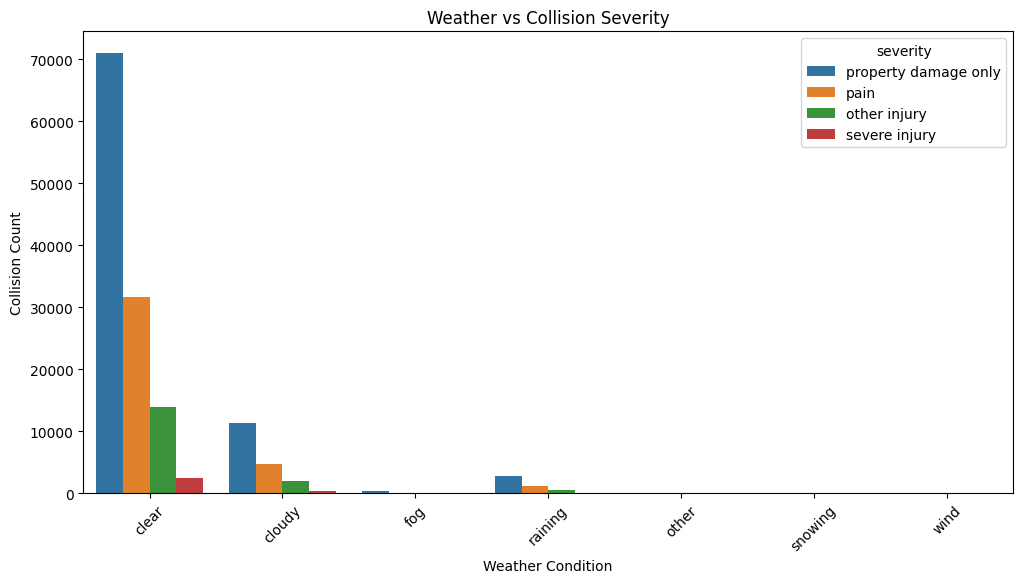

In [81]:
# Weather vs. Collision Severity

# Convert to Pandas

# Plot
plt.figure(figsize=(12,6))
sns.countplot(data=pdf, x='weather_1', hue='severity')
plt.title('Weather vs Collision Severity')
plt.xlabel('Weather Condition')
plt.ylabel('Collision Count')
plt.xticks(rotation=45)
plt.show()

##**3.1.7. Lighting conditions vs Collision Severity.** <font color = red>[5 marks]</font> <br>

Q:Visualize the impact of lighting conditions on collision severity.

In [84]:
df_final.groupBy('lighting').count().show(truncate=False)

[Stage 358:>                                                        (0 + 1) / 1]

+---------------------------------------+-----+
|lighting                               |count|
+---------------------------------------+-----+
|dark with no street lights             |9782 |
|dark with street lights                |28385|
|daylight                               |99373|
|dark with street lights not functioning|249  |
|dusk or dawn                           |4866 |
+---------------------------------------+-----+



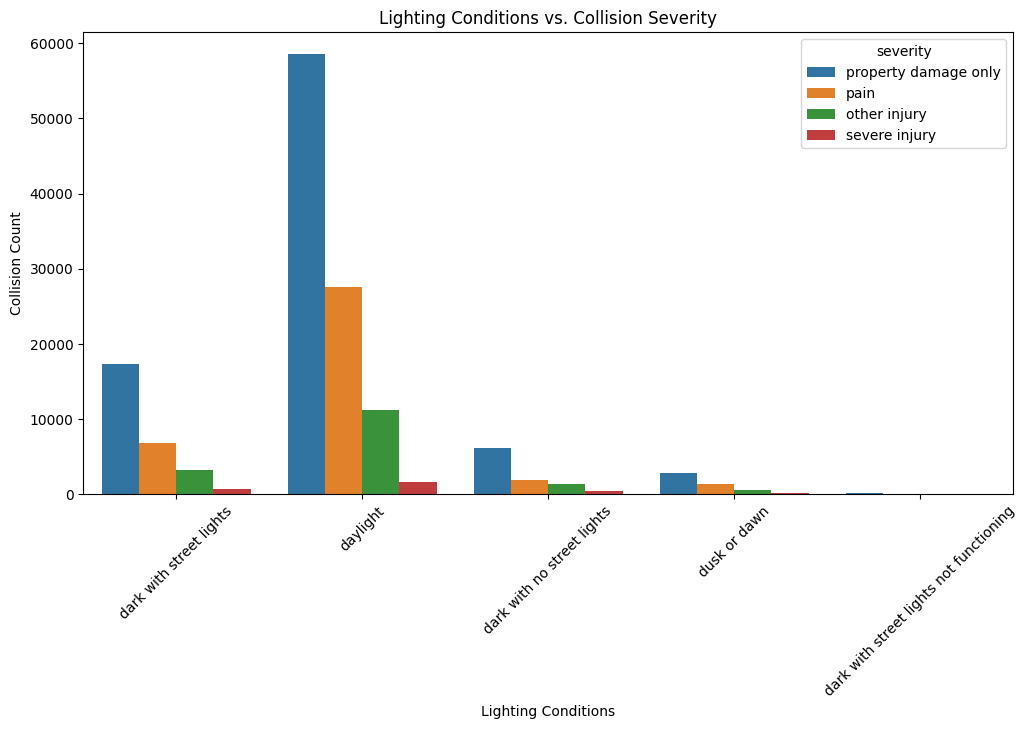

In [22]:
# Lighting Conditions vs. Collision Severity

# Convert to Pandas

# Plot
plt.figure(figsize=(12,6))
sns.countplot(data=pdf, x='lighting', hue='severity')
plt.title('Lighting Conditions vs. Collision Severity')
plt.xlabel('Lighting Conditions')
plt.ylabel('Collision Count')
plt.xticks(rotation=45)
plt.show()

##**3.1.8. Weekday-Wise Collision Trends.** <font color = red>[7 marks]</font> <br>

Q: Extract and analyze weekday-wise collision trends.

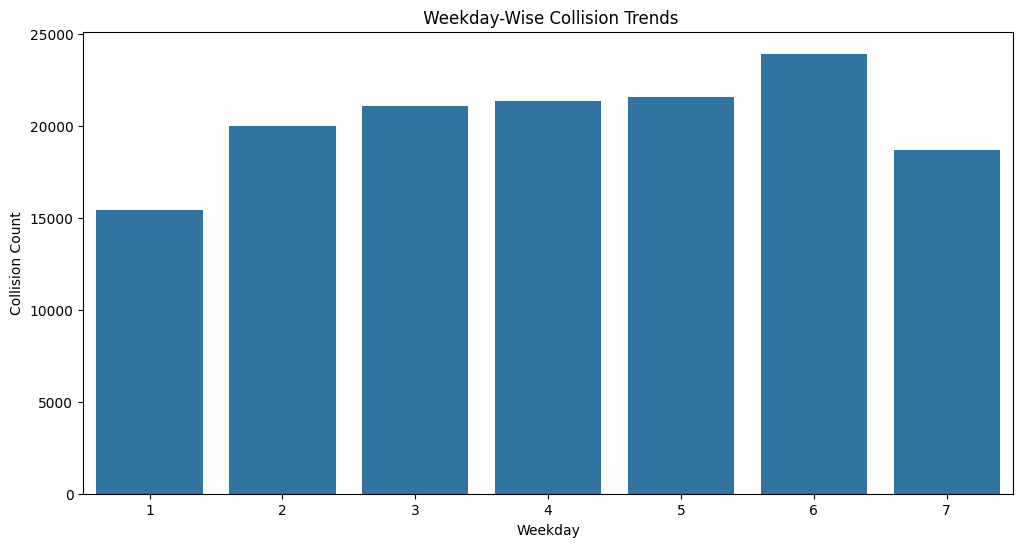

In [36]:
# Extract the weekday
weekday_counts = pdf.groupby('day_of_week')['severity'].count().reset_index()
# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=weekday_counts, x='day_of_week', y='severity')
plt.title(' Weekday-Wise Collision Trends')
plt.xlabel('Weekday')
plt.ylabel('Collision Count')
plt.show()

##**3.1.9. Spatial Distribution of Collisions.** <font color = red>[7 marks]</font> <br>

Q: Study spatial distribution of collisions by county.

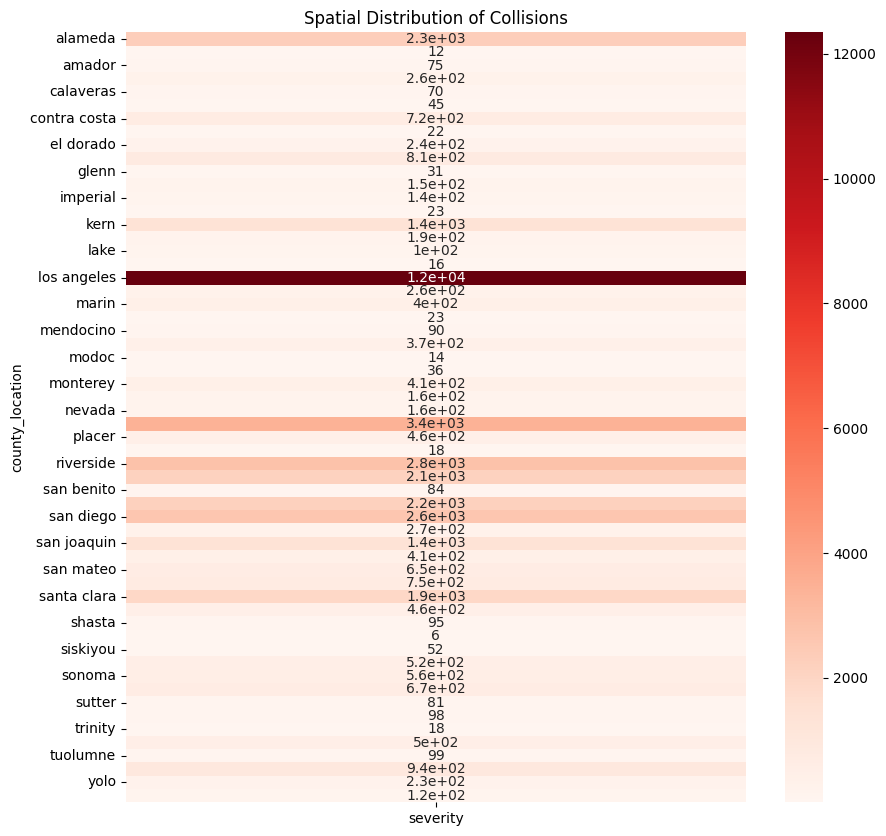

In [56]:
# Spatial Analysis
county_df = pdf.groupby('county_location')['severity'].count().reset_index()
# Collision Density by County
# Plot the map
plt.figure(figsize=(10,10))
sns.heatmap(county_df.pivot_table(values='severity', index='county_location'), cmap='Reds', annot=True)
plt.title('Spatial Distribution of Collisions')
plt.show()

##**3.1.10. Collision Analysis by Geography.** <font color = red>[6 marks]</font> <br>

Q: Generate a scatter plot to analyze collision locations geographically.

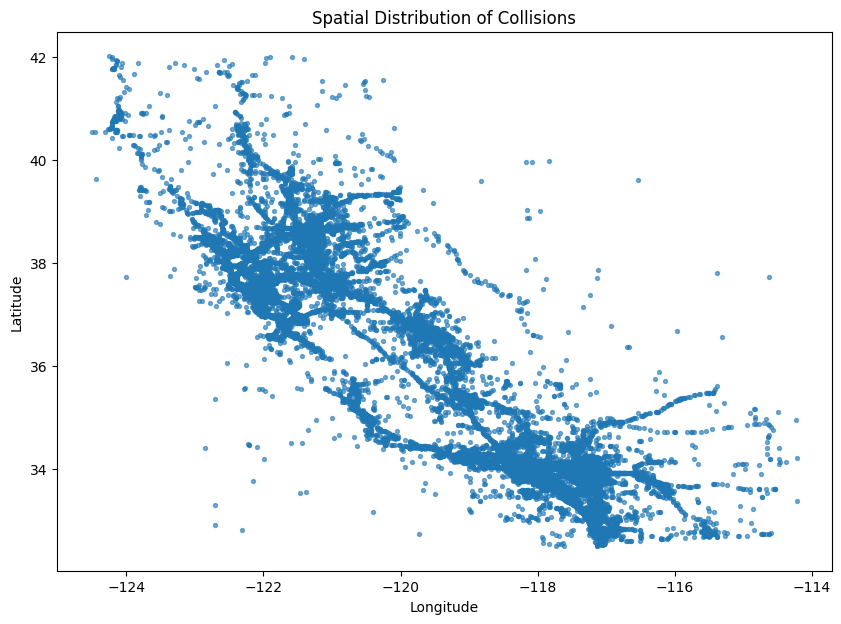

In [20]:
# Scatter Plot of Collision Locations

# Convert PySpark DataFrame to Pandas, handling potential missing values

# Convert to numeric (if needed) and handle invalid data

# Plot the scatter plot
pdf_map_temp = pdf[(pdf['latitude'] != 0) & (pdf['longitude'] != 0)]
plt.figure(figsize=(10,7))
plt.scatter(pdf_map_temp['longitude'], pdf_map_temp['latitude'], s=8, alpha=0.6)
plt.title('Spatial Distribution of Collisions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

##**3.1.11. Collision Trends Over Time.** <font color = red>[10 marks]</font> <br>

Extract and analyzing collision trends over time.

In [ ]:
from pyspark.sql.functions import year, month, hour, to_timestamp, col

# Extract year and month from collision_date

# Plot


Q: Analyze yearly, monthly and hourly trends in collisions.

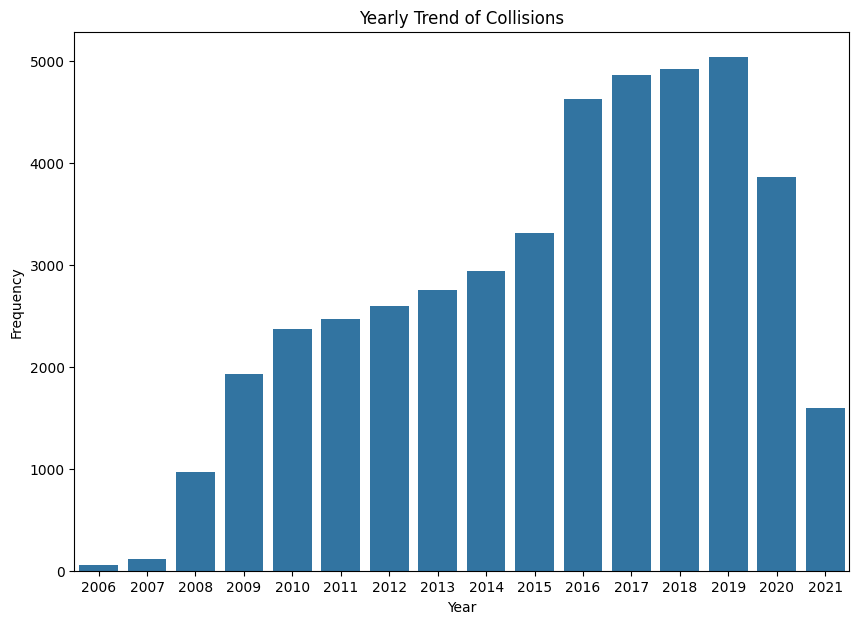

In [70]:
# Yearly Trend of Collisions
yearly_trends = pdf.groupby('year').size().reset_index(name='collision_count')
# Plot
plt.figure(figsize=(10,7))
sns.barplot(data=yearly_trends,x='year', y='collision_count')
plt.title('Yearly Trend of Collisions')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

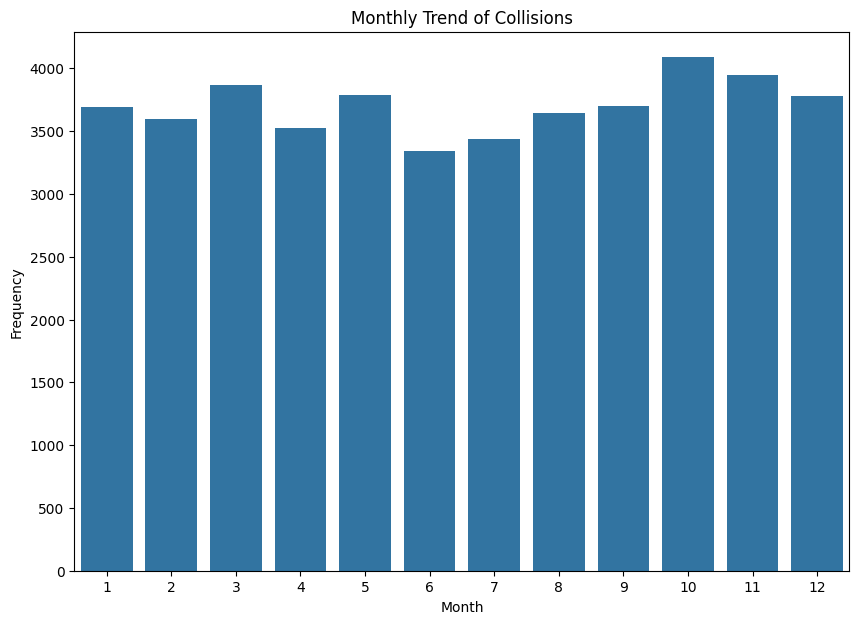

In [69]:
# Monthly Trend of Collisions
monthly_trends = pdf.groupby('month').size().reset_index(name='collision_count')
# Plot
plt.figure(figsize=(10,7))
sns.barplot(data=monthly_trends,x='month', y='collision_count')
plt.title('Monthly Trend of Collisions')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show()

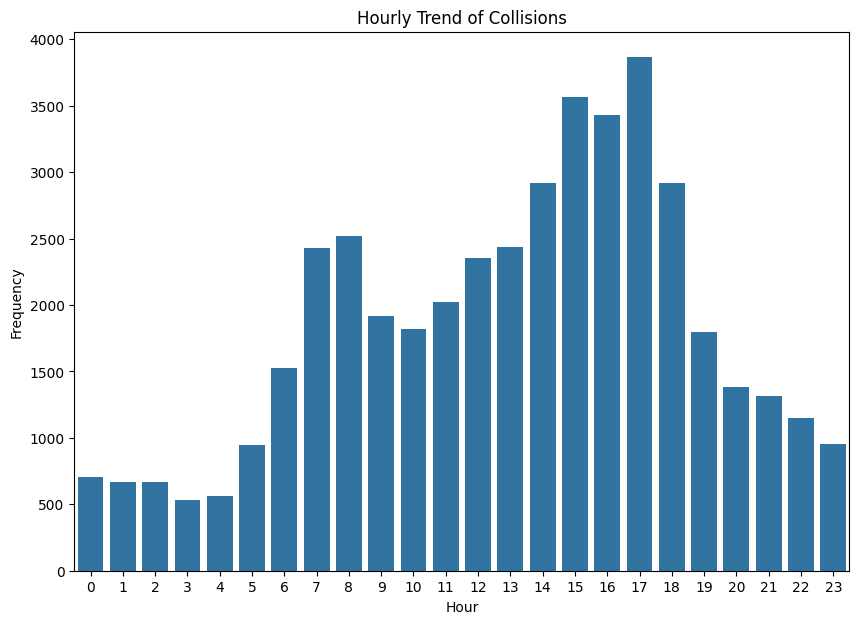

In [72]:
# Hourly Trend of Collisions
hourly_trends = pdf.groupby('hour').size().reset_index(name='collision_count')
# Plot
plt.figure(figsize=(10,7))
sns.barplot(data=hourly_trends,x='hour', y='collision_count')
plt.title('Hourly Trend of Collisions')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.show()

#**4. ETL Querying** <font color = red>[35 marks]</font> <br>

##**4.1 Loading the Dataset** <font color = red>[1 marks]</font> <br>

Q: Load the processed dataset as CSV files in S3 bucket.

In [ ]:
# Write DataFrame to S3 in CSV format
df_final.write.csv("s3a://collision_cleaned/processed/collisions_csv", header=True)

In [21]:
df_final.createOrReplaceTempView("collisions")

## **4.2. Top 5 Counties** <font color = red>[4 marks]</font> <br>

Q: Identify the top 5 counties with the highest number of collisions.

In [76]:
# Query: Identify the top 5 counties with the most collisions
top5 = spark.sql('''
        SELECT county_location, COUNT(*) AS count_of_collisions
        FROM collisions
        GROUP BY county_location
        ORDER BY count_of_collisions DESC
        LIMIT 5
        ''')
top5.show()

[Stage 42:>                                                       (0 + 11) / 11]

+---------------+-------------------+
|county_location|count_of_collisions|
+---------------+-------------------+
|    los angeles|              44397|
|         orange|              11706|
| san bernardino|               8672|
|      san diego|               8064|
|      riverside|               7408|
+---------------+-------------------+



##**4.3. Month with Highest Collisions** <font color = red>[5 marks]</font> <br>

Q. Identify the month with the highest number of collisions.

In [22]:
# Query: Find the month with the highest number of collisions
top_month = spark.sql('''
                    SELECT month, COUNT(*) AS number_of_collisions
                    FROM collisions
                    GROUP BY month
                    ORDER BY number_of_collisions DESC
                    LIMIT 1
                    '''
                     )
top_month.show()

[Stage 38:===================================================>    (12 + 1) / 13]

+-----+--------------------+
|month|number_of_collisions|
+-----+--------------------+
|   10|               12703|
+-----+--------------------+



##**4.4. Weather Conditions with Highest Collisions.** <font color = red>[5 marks]</font> <br>

Q. Determine the most common weather condition during collisions.

In [23]:
# Query: Find the most common weather condition during collisions
common_weather_condition = spark.sql('''
                                    SELECT weather_1, COUNT(*) AS count
                                    FROM collisions
                                    GROUP BY weather_1
                                    ORDER BY count DESC
                                    LIMIT 1
                                    '''
                                    )
common_weather_condition.show()

[Stage 56:>                                                         (0 + 8) / 8]

+---------+------+
|weather_1| count|
+---------+------+
|    clear|118313|
+---------+------+



##**4.5. Fatal Collisions.** <font color = red>[5 marks]</font> <br>

Q. Calculate the percentage of collisions that resulted in fatalities.

In [28]:
# Query: Determine the percentage of collisions that resulted in fatalities
percentage_of_fatalities = spark.sql('''
                                    SELECT COUNT(case_id) AS total_collisions , SUM(CASE WHEN killed_victims > 0 THEN 1 ELSE 0 END) AS total_fatalities,
                                    (total_fatalities * 100.0 / COUNT(case_id)) AS fatality_percentage
                                    FROM collisions
                                    '''
                                    )
percentage_of_fatalities.show()

[Stage 83:===================================================>    (12 + 1) / 13]

+----------------+----------------+-------------------+
|total_collisions|total_fatalities|fatality_percentage|
+----------------+----------------+-------------------+
|          141914|               0|   0.00000000000000|
+----------------+----------------+-------------------+



##**4.6. Dangerous Time for Collisions.** <font color = red>[5 marks]</font> <br>

Q. Find the most dangerous time of day for collisions.

In [29]:
# Query: Find the most dangerous time of day for collisions
dangerous_time_of_the_day = spark.sql('''
                                      SELECT hour, COUNT(*) AS collisions_count
                                      FROM collisions
                                      GROUP BY hour
                                      ORDER BY collisions_count DESC
                                      LIMIT 1
                                      '''
                                     )
dangerous_time_of_the_day.show()

[Stage 101:======================>                                 (4 + 6) / 10]

+----+----------------+
|hour|collisions_count|
+----+----------------+
|  17|           11845|
+----+----------------+



##**4.7. Road Surface Conditions.** <font color = red>[5 marks]</font> <br>

Q. Identify the top 5 road surface conditions with the highest collision frequency.

In [30]:
# Query: List the top 5 road types with the highest collision frequency
top5_road_type = spark.sql('''
                            SELECT road_surface, COUNT(*) AS collision_frequency
                            FROM collisions
                            GROUP BY road_surface
                            ORDER BY collision_frequency DESC
                            LIMIT 5
                            '''
                          )
top5_road_type.show()

[Stage 115:=====================>                                   (3 + 5) / 8]

+------------+-------------------+
|road_surface|collision_frequency|
+------------+-------------------+
|         dry|             130513|
|         wet|              10779|
|       snowy|                502|
|    slippery|                116|
|           H|                  4|
+------------+-------------------+



##**4.8. Lighting Conditions.** <font color = red>[5 marks]</font> <br>

Q. Analyze lighting conditions that contribute to the highest number of collisions.

In [ ]:
# Query: Find the top 3 lighting conditions that lead to the most collisions


#5. Conclusion <font color = red>[10 marks]</font> <br>

Write your conclusion.

In [ ]:
# Final insights and recommendations

#6. Visualization Integration using Tableau/ PowerBI <font color = red>[Optional]</font> <br>